<a href="https://colab.research.google.com/github/ThaiNguyenLongHai/Hai/blob/main/AI_NhanDienKhuonMat_ThaiNguyenLongHai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
from keras.models import Sequential,Model
from keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU,BatchNormalization, Dropout
from keras.layers import Dropout,Activation
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
from keras import optimizers
from keras.models import Sequential,Model
from keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.layers import Dropout,Activation
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy


In [3]:
from google.colab import drive
drive.mount('/content/drive')
folder = '/content/drive/MyDrive/AI_Face_Gp/'
photos,labels = list(),list()

Mounted at /content/drive


In [5]:
for file in listdir(folder):
  if file.startswith('Dung'):
    output = 0
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)   
for file in listdir(folder):
  if file.startswith('Hai'):
    output = 1
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)   
for file in listdir(folder):
  if file.startswith('Hieu'):
    output = 2
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)   
for file in listdir(folder):
  if file.startswith('Duc'):
    output = 3
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)   


In [18]:
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('Dung_Hai_Hieu_Duc_photos.npy',photos)
save('Dung_Hai_Hieu_Duc_labels.npy',labels)

(4, 40, 30, 3) (4,)


In [19]:
print(labels.shape)
photos.shape

(4,)


(4, 40, 30, 3)

In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(40,30,3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])




In [21]:
history = model.fit(photos, labels,batch_size=5, epochs=20, verbose=1)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 229.9497 - accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 27ms/step - loss: 257.7130 - accuracy: 0.2500
Epoch 3/20
1/1 [==============================] - 0s 38ms/step - loss: 348.6823 - accuracy: 0.2500
Epoch 4/20
1/1 [==============================] - 0s 27ms/step - loss: 340.0005 - accuracy: 0.2500
Epoch 5/20
1/1 [==============================] - 0s 26ms/step - loss: 150.9315 - accuracy: 0.2500
Epoch 6/20
1/1 [==============================] - 0s 26ms/step - loss: 130.5963 - accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 23ms/step - loss: 113.2790 - accuracy: 0.5000
Epoch 8/20
1/1 [==============================] - 0s 23ms/step - loss: 79.4565 - accuracy: 0.5000
Epoch 9/20
1/1 [==============================] - 0s 24ms/step - loss: 71.7623 - accuracy: 0.5000
Epoch 10/20
1/1 [==============================] - 0s 23ms/step - loss: 37.9549 - accuracy: 0.7500
Epoch 11/2

In [22]:
model.evaluate(photos,labels)



1/1 [==============================] - 0s 205ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [23]:
model.save('AI_Nhandangkhuonmat.h5')
classes = ["Dung","Hai","Hieu","Duc"]

1/1 [==============================] - 0s 23ms/step
[[0.4303992  0.20622611 0.07589646 0.10831262 0.06896489 0.03471864
  0.00779425 0.04389967 0.01205158 0.01173656]]


[0]

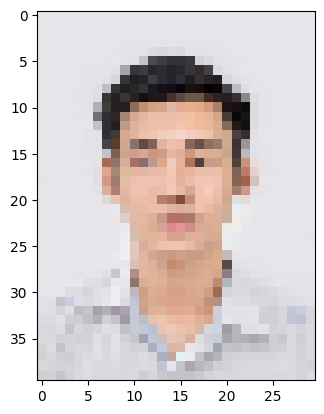

In [26]:
img = load_img('/content/drive/MyDrive/AI_Face_Gp/Dung.jpg', target_size=(40,30))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1 ,40 , 30 ,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes


1/1 [==============================] - 0s 22ms/step
[[0.22487602 0.26345477 0.10736648 0.1351582  0.09297638 0.05549177
  0.02113362 0.05994426 0.02042292 0.01917563]]


[1]

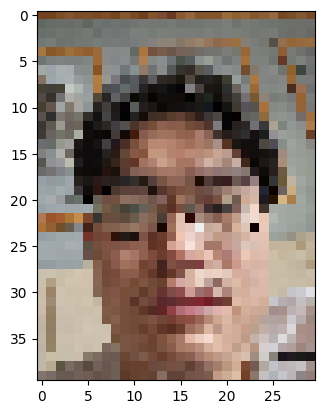

In [27]:
img = load_img('/content/drive/MyDrive/AI_Face_Gp/Hai.jpg', target_size=(40,30))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1 ,40 , 30 ,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes

1/1 [==============================] - 0s 42ms/step
[[0.20654453 0.19330716 0.08183414 0.25522467 0.09872722 0.0414943
  0.01894285 0.0584406  0.023377   0.02210758]]


[3]

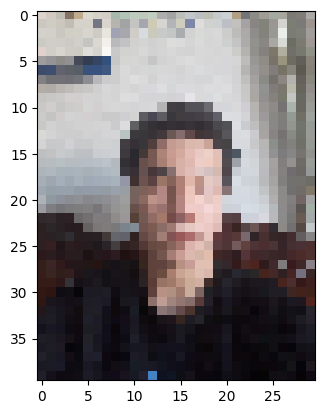

In [29]:
img = load_img('/content/drive/MyDrive/AI_Face_Gp/Duc.jpg', target_size=(40,30))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1 ,40 , 30 ,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes

1/1 [==============================] - 0s 41ms/step
[[0.35267094 0.21200983 0.10645878 0.11486829 0.07555062 0.04380443
  0.01195091 0.05271742 0.01473883 0.01522989]]


[0]

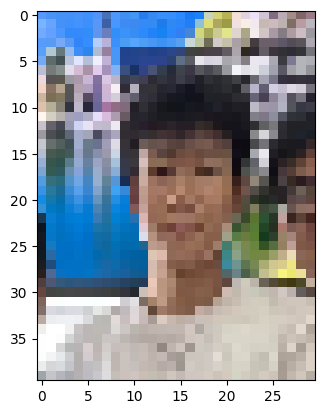

In [32]:
img = load_img('/content/drive/MyDrive/AI_Face_Gp/Hieu.jpg', target_size=(40,30))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1 ,40 , 30 ,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes